In [1]:
# TRANSOMN RESONANCE FREQUENCY 
    # WG=(SQRT(8EJ)-EC/H)
        #EJ = JOSHPEHON ENERGY 
        #EC = CAPCTIRO ENERGY 
        # H = PLANCK'S CONSTANT

# BASED ON PAPER COMMON EC VALUES: 300 - 310 MHz ||| COMMON EJ VALUES: 15-25 GHz
# A QUANTUM ENGINEER'S GUIDE. TO SUPERCONDUCTING QUBITS: "Modern planar transmon qubits can achieve T₁ values in the 20–100 μs range depending on substrate, geometry, and environment."

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from qutip import *

h= 6.62607015e-34
EC= 300e6 * h
EJ=15e9 * h

wq=(np.sqrt(8*EJ*EC)-EC)/h
print("Resonace frequency: " + str(wq))

Resonace frequency: 5700000000.0


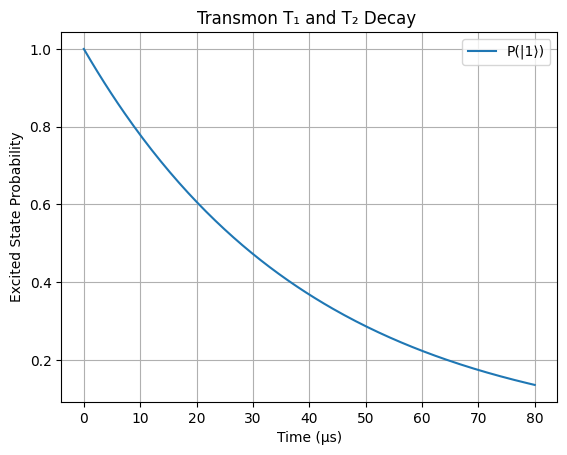

In [ ]:
T1=40e-6
T2=60e-6
gamma1 = 1 / T1     # T1 decay rate
gamma_phi = 1 / T2 - gamma1 / 2  # Pure dephasing rate

# Hilbert space: 3 levels of transmon
N = 3
a = destroy(N)

# Hamiltonian 
H = 2 * np.pi * wq * a.dag() * a

# Initial state: first excited state |1⟩
psi0 = basis(N, 1)

# Collapse operators
c_ops = [np.sqrt(gamma1) * a, np.sqrt(gamma_phi) * a.dag() * a]

# Time vector (simulate for 0–80 µs)
tlist = np.linspace(0, 80e-6, 200)

# Simulate time evolution
result = mesolve(H, psi0, tlist, c_ops, [a.dag() * a])

# Plot population in |1⟩
plt.plot(tlist * 1e6, result.expect[0], label="P(1⟩)")
plt.xlabel("Time (µs)")
plt.ylabel("Excited State Probability")
plt.title("Transmon T₁ and T₂ Decay ")
plt.grid(True)
plt.legend()
plt.show()
 # ghghghghghghghghgh